<a href="https://colab.research.google.com/github/savioramos1/TCC-Ciencia-de-dados/blob/main/TCC_Ci%C3%AAncia_de_Dados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A Utilização de Técnicas de Aprendizado de Máquina para Identificação de Mensagens de Spam

A detecção de mensagens de spam, ou seja, mensagens indesejadas e não solicitadas, é uma questão importante na era digital atual, com o aumento do volume de comunicações eletrônicas, como e-mails, mensagens de texto e mensagens em redes sociais. O uso de técnicas de machine learning na detecção de spam tem se tornado cada vez mais relevante devido à sua eficácia e capacidade de adaptação às constantes mudanças nas táticas utilizadas pelos spammers.

A detecção de spam é fundamental para garantir a qualidade e a segurança das comunicações online. O spam pode ser uma fonte de incômodo para os usuários, prejudicando sua produtividade e privacidade, e também pode ser usado para fins maliciosos, como phishing, disseminação de malware e golpes financeiros. A detecção de spam é, portanto, uma ferramenta essencial na proteção dos usuários e na manutenção da integridade das comunicações eletrônicas.

![Spam](https://consultormarketing.digital/wp-content/uploads/2020/07/O-que-e%CC%81-Spam-e-como-evita%CC%81-lo.jpg)

As técnicas de machine learning têm sido aplicadas com sucesso na detecção de spam devido à sua capacidade de aprender a partir de grandes quantidades de dados e identificar padrões ocultos. Os algoritmos de machine learning podem ser treinados com base em exemplos rotulados de mensagens de spam e mensagens legítimas, permitindo-lhes aprender a distinguir entre essas duas categorias. À medida que os spammers desenvolvem novas estratégias e táticas, os algoritmos de machine learning podem ser ajustados e atualizados para se adaptarem a essas mudanças, tornando a detecção de spam mais eficaz e precisa.

Além disso, a detecção de spam com machine learning permite a automatização do processo de filtragem, o que pode ser extremamente útil quando se lida com grandes volumes de mensagens. Isso economiza tempo e recursos, tornando o processo de gerenciamento de e-mails e mensagens mais eficiente.

No entanto, a detecção de spam com machine learning também apresenta desafios, como a necessidade de lidar com falsos positivos (mensagens legítimas erroneamente classificadas como spam) e falsos negativos (mensagens de spam erroneamente classificadas como legítimas). Além disso, os spammers estão em constante evolução, adaptando suas táticas para evitar a detecção, o que requer constante atualização dos modelos de machine learning.

Portanto, a detecção de mensagens de spam com o uso de técnicas de machine learning é importante para proteger os usuários e garantir a qualidade e a segurança das comunicações eletrônicas. Ela oferece uma abordagem eficaz e automatizada para identificar e filtrar mensagens indesejadas, embora também apresente desafios que precisam ser enfrentados para manter a eficácia dos modelos de detecção.

#Importando os dados

In [ ]:
#Importar bibliotecas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import string
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

ps = PorterStemmer()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
uci_spam = "https://www.dropbox.com/s/j9l57ks9730hxm8/spam.csv?dl=1" #UCI SMS_spam_collection
apache_spam= "https://www.dropbox.com/s/ugo2tv022pwyakk/spam_or_not_spam.csv?dl=1" #SpamAssassinApache

# Importar os arquivos para os DataFrame
df_uci = pd.read_csv(uci_spam)
df_apache= pd.read_csv(apache_spam)

In [ ]:
df_apache['email'].replace('NUMBER', '', regex= True, inplace=True)
df_apache['email'].replace('hyperlink', '', regex= True, inplace=True)
df_apache['email'].replace('e mail', '', regex= True, inplace=True)

In [ ]:
!python -V

Python 3.8.16


#Tratamento dos dados

In [ ]:
#Imprimir as primeiras linhas do datafreme
df_uci.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Imprimir as primeiras linhas do datafreme
df_apache.head()

,email,label
0,date wed aug from chris garrigues cwg d...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
#Informações referente ao dataframe UCI
df_uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#Informações referente ao dataframe Apache 
df_apache.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
#Substituindo "ham" por 0 e "spam" por 1
df_uci.replace("ham",0, inplace = True)
df_uci.replace("spam",1, inplace = True)

In [ ]:
#Remomendo as colunas dos dois dataframes
df_uci.rename(columns={"Message": "MENSAGEM"},inplace=True)
df_uci.rename(columns={"Category":"CATEGORIA"},inplace=True)

df_apache.rename(columns={"email": "MENSAGEM"},inplace=True)
df_apache.rename(columns={"label": "CATEGORIA"},inplace=True)

In [ ]:
df_uci

,CATEGORIA,MENSAGEM
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
#Troca de posição das colunas do dataframe UCI
df_uci = df_uci[['MENSAGEM', 'CATEGORIA']]
print(df_uci)

                                               MENSAGEM  CATEGORIA
0     Go until jurong point, crazy.. Available only ...          0
1                         Ok lar... Joking wif u oni...          0
2     Free entry in 2 a wkly comp to win FA Cup fina...          1
3     U dun say so early hor... U c already then say...          0
4     Nah I don't think he goes to usf, he lives aro...          0
...                                                 ...        ...
5567  This is the 2nd time we have tried 2 contact u...          1
5568               Will ü b going to esplanade fr home?          0
5569  Pity, * was in mood for that. So...any other s...          0
5570  The guy did some bitching but I acted like i'd...          0
5571                         Rofl. Its true to its name          0

[5572 rows x 2 columns]


In [ ]:
#Unindo os dois dataframes
df=pd.concat([df_uci, df_apache], ignore_index=True)
print(df)

                                               MENSAGEM  CATEGORIA
0     Go until jurong point, crazy.. Available only ...          0
1                         Ok lar... Joking wif u oni...          0
2     Free entry in 2 a wkly comp to win FA Cup fina...          1
3     U dun say so early hor... U c already then say...          0
4     Nah I don't think he goes to usf, he lives aro...          0
...                                                 ...        ...
8567   abc s good morning america ranks it the  chri...          1
8568      let mortgage lenders compete for your busi...          1
8569   thank you for shopping with us gifts for all ...          1
8570   the famous ebay marketing e course learn to s...          1
8571   hello this is chinese traditional 子 件 世 o最有效的...          1

[8572 rows x 2 columns]


In [ ]:
#verificar os valores nulos
df.isna().sum()

MENSAGEM     1
CATEGORIA    0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
#Verficar dados duplicados
df.duplicated().value_counts()

False    8029
True      542
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
#Definição das stopwords
stopword_padrao =stopwords.words('english')
stopword_extra = ['number','http','subject','url','URL','list','spamassassin','rpm','date','freshrpms']

stopword = stopword_padrao + stopword_extra

In [ ]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def transformar_texto(texto):

    #Removendo tags HTML
    soup = BeautifulSoup(texto, "html.parser")
    texto_limpo = soup.get_text()

    #Colocando texto em caixa baixa
    texto = texto_limpo.lower()
    
    #Decompondo o texto em termos
    texto = nltk.word_tokenize(texto)

    y = []
    for i in texto:
        if i.isalnum():
            y.append(i)
    
    texto = y[:]
    y.clear()
    
    
    #Aplicação das stopwords
    for i in texto:
        if i not in stopword and i not in string.punctuation:
            y.append(i)
            
    texto = y[:]
    y.clear()
    
    #Aplicação de stemming
    for i in texto:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
#Aplicação da função transformar texto a coluna mensagem
df['TEXTO_TRANSFORMADO'] = df['MENSAGEM'].apply(transformar_texto)

In [ ]:
df

,MENSAGEM,CATEGORIA,TEXTO_TRANSFORMADO
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah think goe usf live around though
...,...,...,...
8567,abc s good morning america ranks it the chri...,1,abc good morn america rank christma toy season...
8568,let mortgage lenders compete for your busi...,1,let mortgag lender compet busi receiv email ad...
8569,thank you for shopping with us gifts for all ...,1,thank shop us gift occas free gift purchas lim...
8570,the famous ebay marketing e course learn to s...,1,famou ebay market e cours learn sell complet e...


#Análise Exploratória

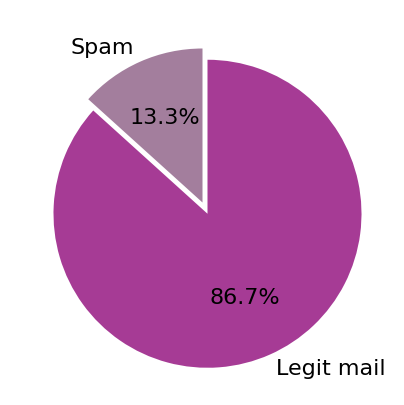

In [ ]:
#verificar a % de spam e nao spam
category_names = ['Spam',"Legit mail"]
size = [df.CATEGORIA.value_counts()[1],df.CATEGORIA.value_counts()[0]]

c = ['#A37E9D', '#A63B95']

#plotar grafico de pizza
plt.figure(figsize=(5,5), dpi=100)
plt.pie(size, labels=category_names, textprops={'fontsize':16}, startangle=90, autopct='%1.1f%%',
        explode=[0,0.08], colors = c)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['CATEGORIA'] = encoder.fit_transform(df['CATEGORIA'])

In [ ]:
df['CATEGORIA'].value_counts()

0    6961
1    1068
Name: CATEGORIA, dtype: int64

In [ ]:
# Criação das colunas número de palavras, sentenças, caracteres
df['num_caracteres'] = df['MENSAGEM'].apply(len)
df['num_palavras'] = df['MENSAGEM'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentenca'] = df['MENSAGEM'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,MENSAGEM,CATEGORIA,TEXTO_TRANSFORMADO,num_caracteres,num_palavras,num_sentenca
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...,111,24,2
1,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,nah think goe usf live around though,61,15,1


In [ ]:
#verificar estatistica descritivas das mensagens não-spam
df[df['CATEGORIA'] == 0][['num_caracteres','num_palavras','num_sentenca']].describe()

,num_caracteres,num_palavras,num_sentenca
count,6961.000000,6961.000000,6961.000000
mean,458.797587,84.227697,1.536992
std,1899.393570,318.142688,1.190523
min,2.000000,1.000000,1.000000
25%,42.000000,11.000000,1.000000
50%,90.000000,21.000000,1.000000
75%,407.000000,73.000000,2.000000
max,82562.000000,13239.000000,38.000000


In [ ]:
#verficar a mensagem com 13239 palavras
df[df.num_palavras == 13239].MENSAGEM.iloc[0]

' free trade and free markets have proven their ability to lift whole societies out of poverty i m not a socio political history buff does anybody have some clear examples original message from rohit khare khare alumni caltech edu to fork spamassassin taint org sent friday september     pm subject sed s united states roman empire g a world where some live in comfort and plenty while half of the human race lives on less than  a day is neither just nor stable absolutely correct perhaps the most fundamental thing to realize about life on earth today the following is a fascinating document of official government policy that bears close reading it is the aspirations of a wonderful nation in an imperfect world the war on terrorism is not a clash of civilizations it does however reveal the clash inside a civilization a battle for the future of the muslim world this is a struggle of ideas and this is an area where america must excel i was recently at a lecture about the surprising success of r

In [ ]:
#verificar mensagem com 1 palavra
df[df.num_palavras == 1].MENSAGEM.iloc[0]

'Yup'

In [ ]:
##verificar estatistica descritivas das mensagens spam
df[df['CATEGORIA'] == 1][['num_caracteres','num_palavras','num_sentenca']].describe()

,num_caracteres,num_palavras,num_sentenca
count,1068.000000,1068.000000,1068.000000
mean,947.685393,154.111423,2.180712
std,4287.091071,509.167860,1.504172
min,1.000000,0.000000,0.000000
25%,142.750000,27.000000,1.000000
50%,158.000000,33.000000,1.000000
75%,702.250000,120.000000,3.000000
max,105092.000000,11363.000000,9.000000


In [ ]:
#verficar a mensagem com 11363 palavras
df[df.num_palavras == 11363].MENSAGEM.iloc[0]

' sent  message from enenkio URL robert moore date thu sep    am to ulafalaa URL subject hawai i enenkio kingdoms americans shame sent  message from enenkio URL robert moore date thu sep    am to webmaster URL subject hawai i enenkio kingdoms americans shame sent  message from enenkio URL robert moore date tue sep    pm to rbernardo URL subject hawaii enenkio kingdoms americans shame sent  message from enenkio URL robert moore date thu aug    am to doswork URL subject hawai i enenkio kingdoms americans shame sent  message from enenkio URL robert moore date mon aug    pm to web URL subject hawai i enenkio kingdoms americans shame reply from enenkio the following message was recieved saturday  july  nothing has been amdended or changed i hold no responcibility for the content of this message subject enenkio truth answers date sat  jul    est from enenkio URL robert moore to microfreedom URL enenkio truth answers news archives previous news releases and announcements july   replies to asi

In [ ]:
#verficar a mensagem com 0 palavras
df[df.num_palavras == 0].MENSAGEM.iloc[0]

'     '

In [ ]:
spam = df[df['CATEGORIA'] == 1][['num_caracteres','num_palavras','num_sentenca']]
legit = df[df['CATEGORIA'] == 0][['num_caracteres','num_palavras','num_sentenca']]

[]

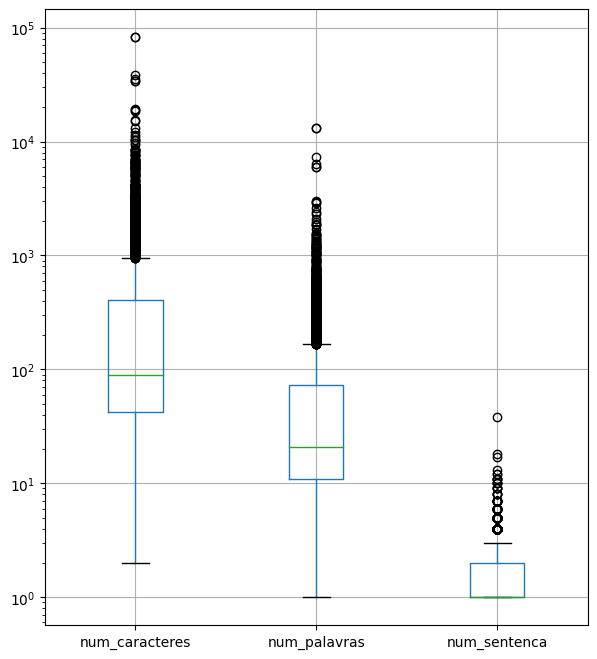

In [ ]:
#Criação de boxplot
legit.boxplot(figsize =(7,8));
plt.semilogy()

[]

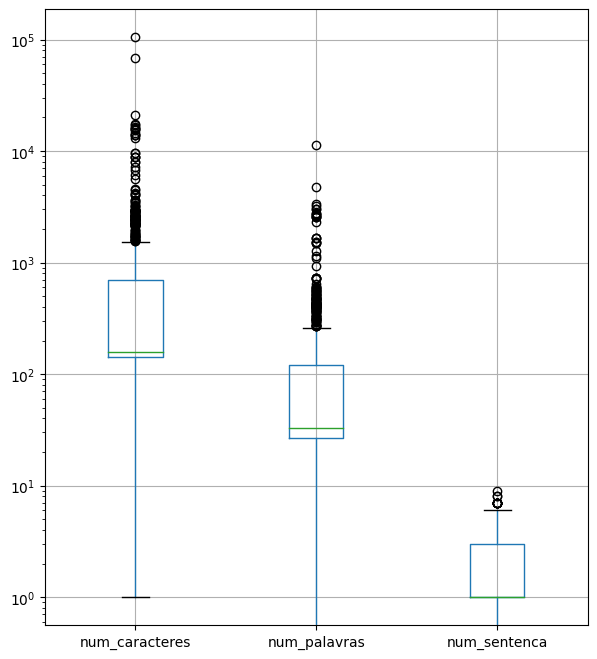

In [ ]:
#Criação de boxplot
spam.boxplot(figsize =(7,8));
plt.semilogy()

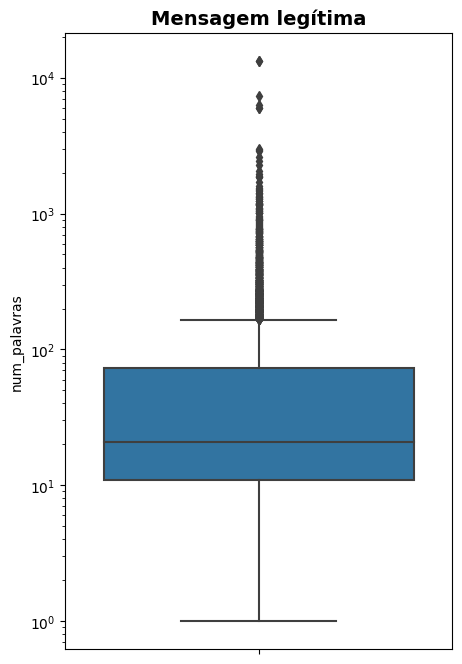

In [ ]:
#Gráfico para verficar outlier 
fig, ax = plt.subplots(figsize=(5,8))
sns.boxplot(y=legit['num_palavras'])
plt.title('Mensagem legítima', fontsize = 14, fontweight = 'bold')
plt.semilogy()
plt.show()

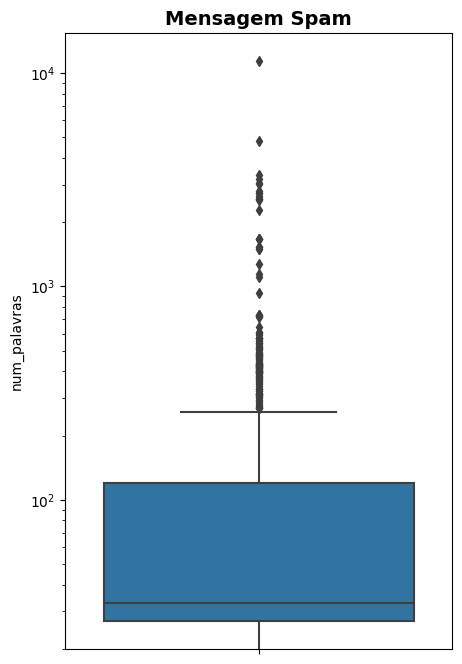

In [ ]:
#Gráfico para verficar outlier 
fig, ax = plt.subplots(figsize=(5,8))
sns.boxplot(y=spam['num_palavras'])
plt.title('Mensagem Spam', fontsize = 14, fontweight = 'bold')
plt.semilogy()
plt.show()

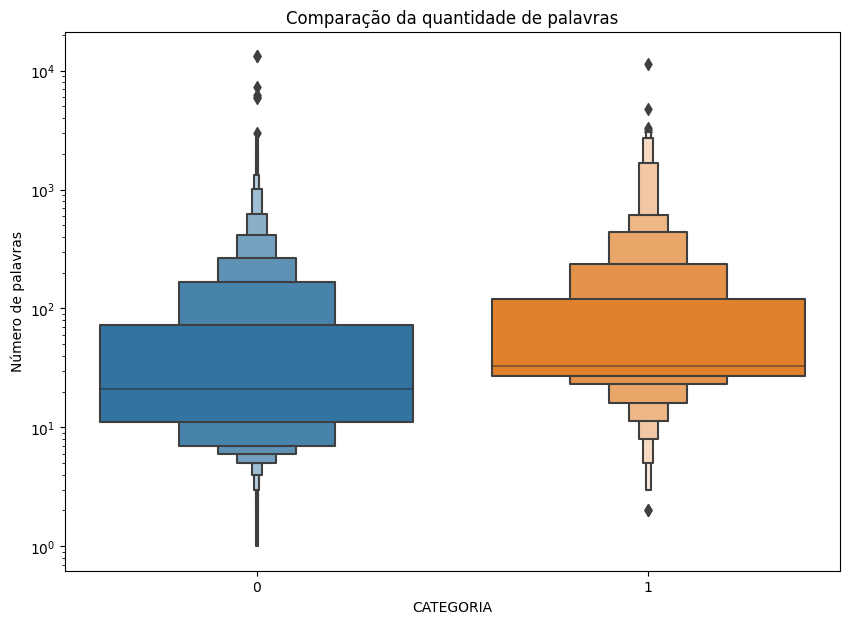

In [ ]:
#Criação de grafico para comparar quantidade de palavras
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxenplot(x=df['CATEGORIA'], y=df['num_palavras'])
plt.title('Comparação da quantidade de palavras')

plt.ylabel("Número de palavras")
plt.semilogy()
plt.show()

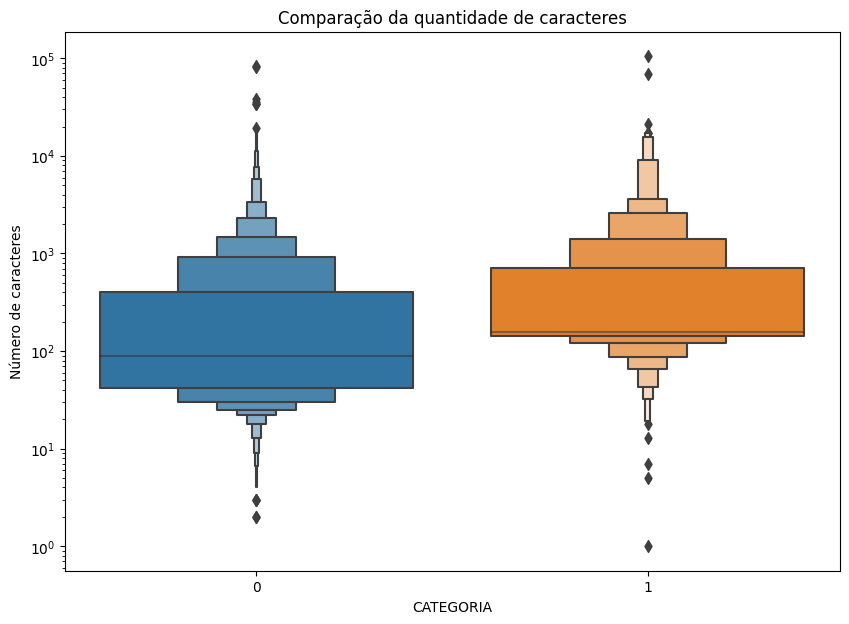

In [ ]:
#Criação de grafico para comparar quantidade de caracteres
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxenplot(x=df['CATEGORIA'], y=df['num_caracteres'])
plt.title('Comparação da quantidade de caracteres')

plt.ylabel("Número de caracteres")
plt.semilogy()
plt.show()

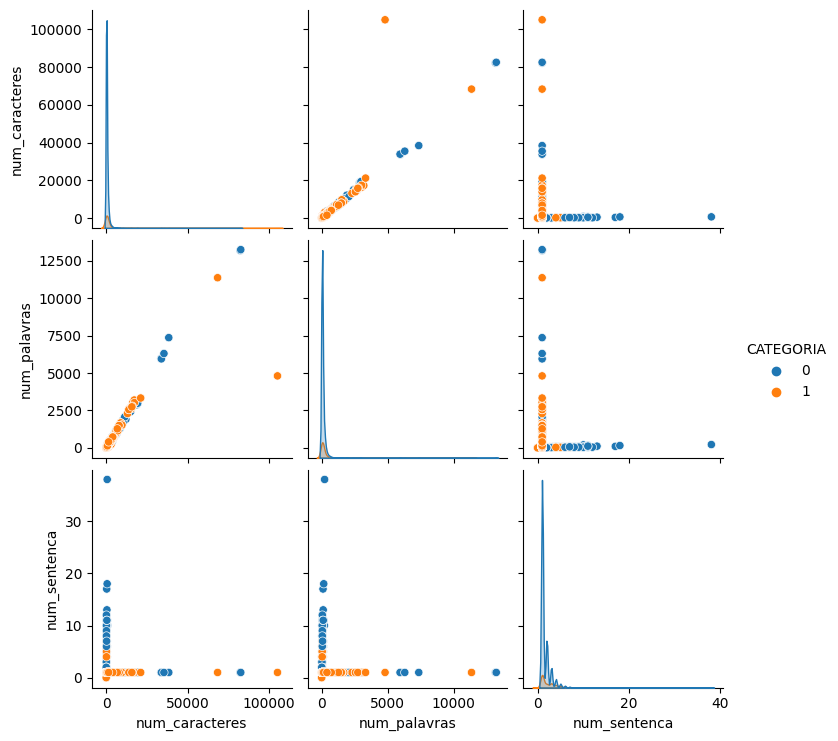

In [ ]:
#Gráfico para analise de dispersão dos dados
sns.pairplot(df, hue ='CATEGORIA')
plt.show()

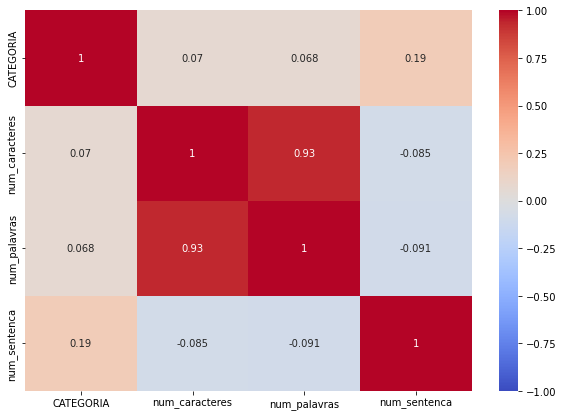

In [ ]:
#Correlação entre as colunas
sns.heatmap(df.corr(),annot=True, vmin =-1, vmax =1, cmap = 'coolwarm')
plt.show()

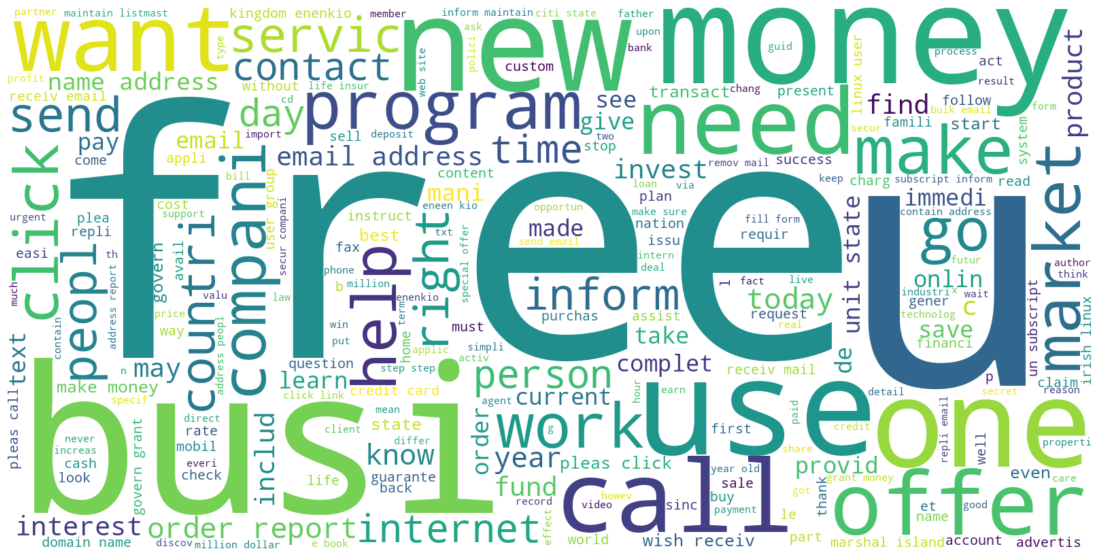

In [ ]:
from wordcloud import WordCloud

# Definindo a configuracação da nuvem de palavras
wc = WordCloud(width = 1600, height = 800, background_color="white", max_words=250, colormap='viridis')

# Criando nuvem de palavras
spam_wc = wc.generate(df[df['CATEGORIA'] == 1]['TEXTO_TRANSFORMADO'].str.cat(sep=' '))

plt.figure(figsize=(20,10))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

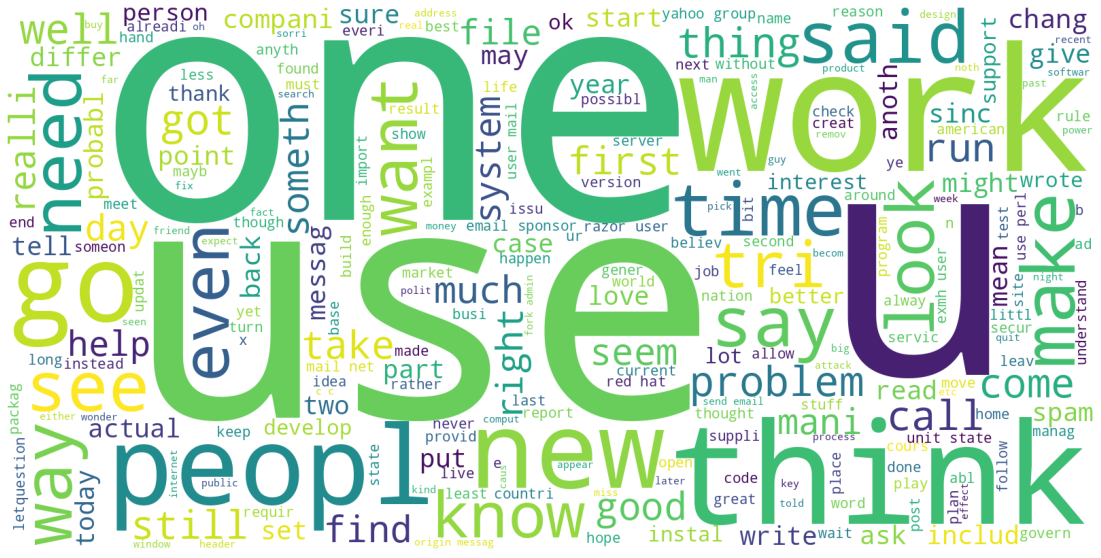

In [ ]:
# Criando nuvem de palavras
legit_wc = wc.generate(df[df['CATEGORIA'] == 0]['TEXTO_TRANSFORMADO'].str.cat(sep=' '))

plt.figure(figsize=(20,10))
plt.imshow(legit_wc)
plt.axis("off")
plt.show()

In [ ]:
# Criando lista de palavras das mensagens spam com o texto processado
spam_corpus = []
for mensagem in df[df['CATEGORIA'] == 1]['TEXTO_TRANSFORMADO'].tolist():
    for palavra in mensagem.split():
        spam_corpus.append(palavra)

# Número de palavras em todas as mensagens spam
len(spam_corpus)

92712

In [ ]:
from collections import Counter

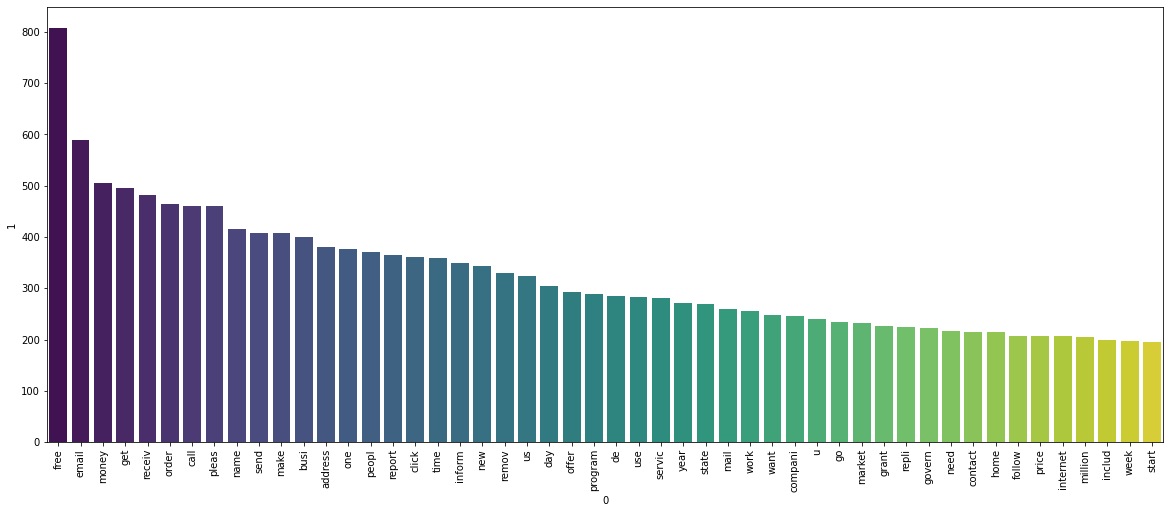

In [ ]:
# 50 palavras mais frequente em mensagens spam
plt.figure(figsize=(20,8))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1], palette = 'viridis')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Criando lista de palavras das mensagens legítimas com o texto processado
legit_corpus = []
for mensagem in df[df['CATEGORIA'] == 0]['TEXTO_TRANSFORMADO'].tolist():
    for palavra in mensagem.split():
        legit_corpus.append(palavra)

# Número de palavras em todas as mensagens legítimas
len(legit_corpus)

308870

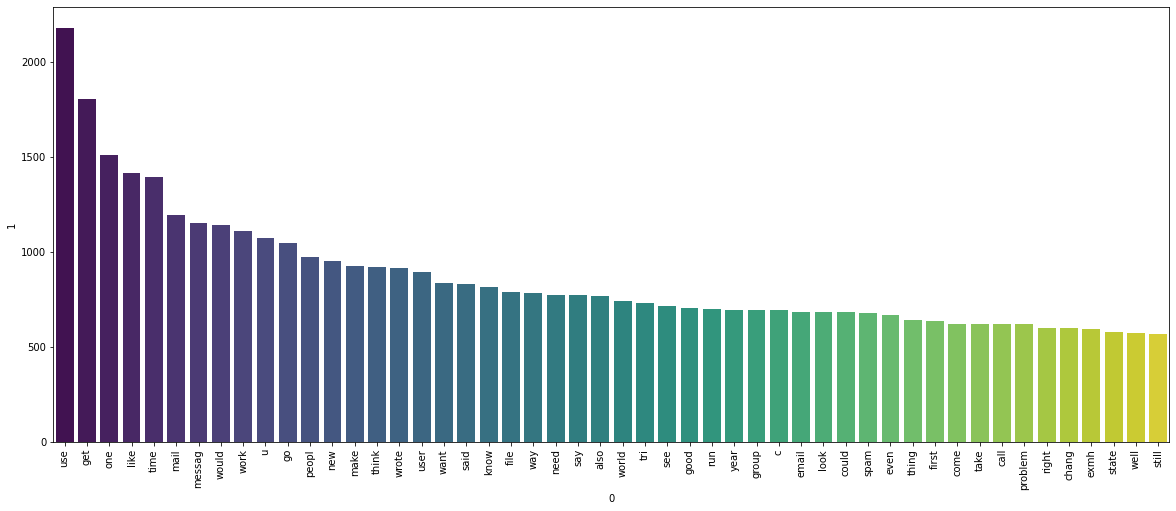

In [ ]:
# 50 palavras mais frequente em mensagens legítimas
plt.figure(figsize=(20,8))
sns.barplot(x=pd.DataFrame(Counter(legit_corpus).most_common(50))[0], y=pd.DataFrame(Counter(legit_corpus).most_common(50))[1], palette = 'viridis')
plt.xticks(rotation='vertical')
plt.show()

#Preparação dos dados

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
#Aplicação da técnica TF-IDF
X = tfidf.fit_transform(df['TEXTO_TRANSFORMADO']).toarray()

In [ ]:
df

,MESSAGEM,CATEGORIA,TEXTO_TRANSFORMADO,num_caracteres,num_palavras,num_sentenca
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...,111,24,2
1,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,nah think goe usf live around though,61,15,1
...,...,...,...,...,...,...
8567,abc s good morning america ranks it the chri...,1,abc good morn america rank christma toy season...,501,87,1
8568,let mortgage lenders compete for your busi...,1,let mortgag lender compet busi receiv email ad...,426,74,1
8569,thank you for shopping with us gifts for all ...,1,thank shop us gift occas free gift purchas lim...,762,139,1
8570,the famous ebay marketing e course learn to s...,1,famou ebay market e cours learn sell complet e...,4006,727,1


In [ ]:
X.shape

(13922, 3000)

In [ ]:
y = df['CATEGORIA'].values

In [ ]:
#Balaceamento das classes
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X, y = smt.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#Modelos de Machine Learning

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
rf = RandomForestClassifier(n_estimators = 500, n_jobs=1, random_state =0)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

0.12570128870193142

In [ ]:
!pip install scikit-plot --q

In [ ]:
import scikitplot as skplt

Classification metrics: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2060
           1       0.99      0.99      0.99      2117

    accuracy                           0.99      4177
   macro avg       0.99      0.99      0.99      4177
weighted avg       0.99      0.99      0.99      4177

Acurária: 0.9878



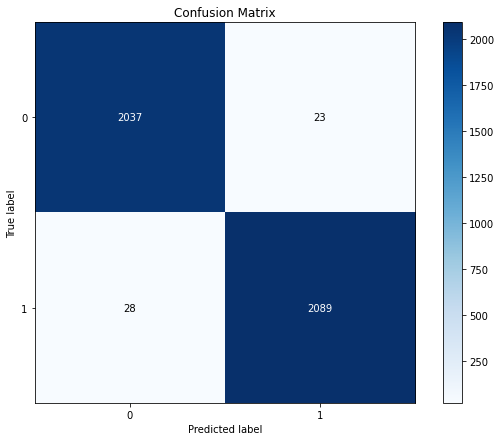

In [ ]:
#imprimir acurácia e classification metrics
print('Classification metrics: \n', classification_report(y_test, y_pred))
print('Acurária: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

#Confusion Matriz
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

###Curva AUC

In [ ]:
pred_prob = rf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve (y_test, random_probs, pos_label =1)

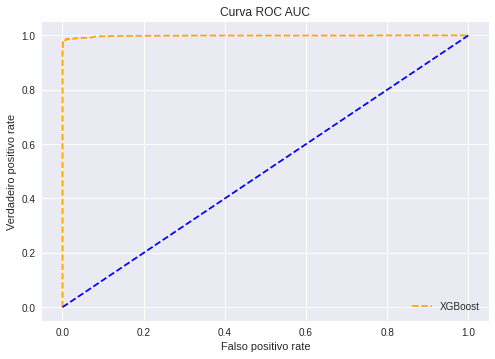

In [ ]:
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

#title
plt.title('Curva ROC AUC')
plt.xlabel('Falso positivo rate')
plt.ylabel('Verdadeiro positivo rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi =300)
plt.show();

In [ ]:
auc_score = roc_auc_score(y_test,pred_prob[:,1])

print('Curva ROC AUC: {:.4f}\n'.format(auc_score))

Curva ROC AUC: 0.9985



##Cross-Validation

In [ ]:
#Cross Validation

cv =  KFold(n_splits = 5, shuffle = True)
scores = cross_val_score(rf, X, y, cv = cv)

print("Acurácia: %.2f%%" % (scores.mean() * 100.0))

Acurácia: 98.64%


#XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(objective ='binary:hinge',
                    learning_rate = 0.09,
                    n_estimators = 1000,
                    max_depth =9,
                    min_child_weight =1,
                    subsample = 0.75,
                    colsample_bynode =0.75,
                    num_parallel_tree =2,
                    random_state =0,
                    gpu_id ='0',
                    tree_method ='gpu_hist',
                    )

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

pred_prob = xgb.predict_proba(X_test)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2060
           1       0.98      0.98      0.98      2117

    accuracy                           0.98      4177
   macro avg       0.98      0.98      0.98      4177
weighted avg       0.98      0.98      0.98      4177

Acurácia: 0.9832



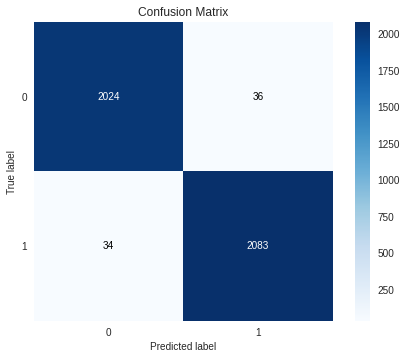

In [ ]:
#imprimir acuracia e classification metrics
print('Classification metrics: \n', classification_report(y_test, y_pred))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

##print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

###Cross-Validation

In [ ]:
#Cross-Validation
cv =  KFold(n_splits = 10, shuffle = True)
scores = cross_val_score(xgb, X, y, cv = cv)

print("Acurácia: %.2f%%" % (scores.mean() * 100.0))

Acurácia: 98.52%


###Curva AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr2, p_tpr2, _ = roc_curve (y_test, random_probs, pos_label =1)

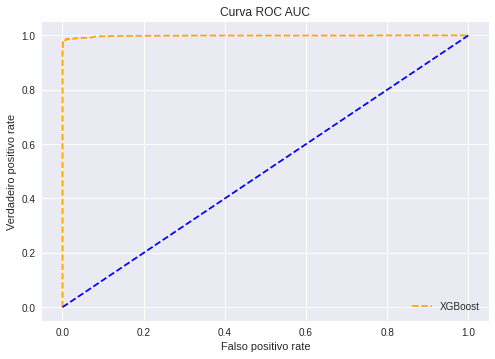

In [ ]:
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

#title
plt.title('Curva ROC AUC')
plt.xlabel('Falso positivo rate')
plt.ylabel('Verdadeiro positivo rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi =300)
plt.show();


In [ ]:
auc_score = roc_auc_score(y_test,pred_prob[:,1])

print('Curva ROC AUC: {:.4f}\n'.format(auc_score))

Curva ROC AUC: 0.9827



#LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(objective ='binary',
                      boosting_type='goss',
                      n_estimators = 1000,
                      max_depth= 7,
                      max_bin = 200,
                      num_leaves =15,
                      min_data_in_leaf = 5,
                      min_sum_hessian_in_leaf = 1e-4,
                      feature_fraction =0.5,
                      learning_rate = 0.1,
                      random_state =0,
                      )
lgbm.fit(X_train,y_train)

y_pred = lgbm.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0001


Classification metrics: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2060
           1       0.99      0.98      0.99      2117

    accuracy                           0.99      4177
   macro avg       0.99      0.99      0.99      4177
weighted avg       0.99      0.99      0.99      4177

Acurácia: 0.9861



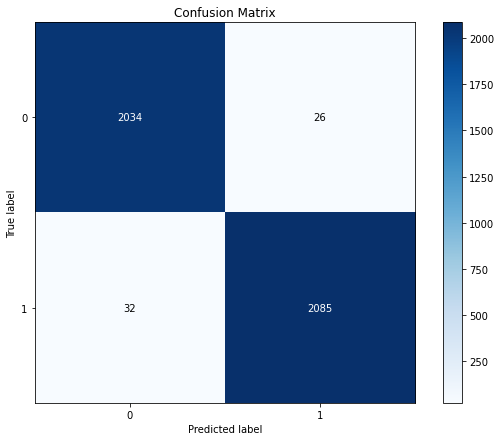

In [ ]:
#imprimir acuracia e classification metrics
print('Classification metrics: \n', classification_report(y_test, y_pred))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

##print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

###Curva AUC

In [ ]:
pred_prob = lgbm.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr3, p_tpr3, _ = roc_curve (y_test, random_probs, pos_label =1)

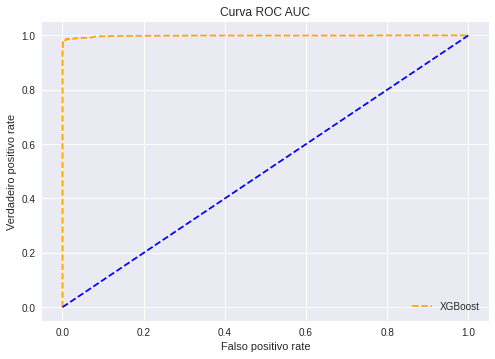

In [ ]:
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

#title
plt.title('Curva ROC AUC')
plt.xlabel('Falso positivo rate')
plt.ylabel('Verdadeiro positivo rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi =300)
plt.show();

In [ ]:
auc_score = roc_auc_score(y_test,pred_prob[:,1])

print('Curva ROC AUC: {:.4f}\n'.format(auc_score))

Curva ROC AUC: 0.9980



###Cross-Validation

In [ ]:
#Cross Validation
cv =  KFold(n_splits = 10, shuffle = True)
scores = cross_val_score(lgbm, X, y, cv = cv)

print("Acurácia: %.2f%%" % (scores.mean() * 100.0))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0001
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0001
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current va

In [ ]:
print('Training set score: {:.4f}'.format(lgbm.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lgbm.score(X_test, y_test)))

Training set score: 0.9961
Test set score: 0.9861


#MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB(alpha=1e-4)
nb.fit(X_train,y_train)

y_pred1 = nb.predict(X_test)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      2060
           1       0.95      0.94      0.95      2117

    accuracy                           0.94      4177
   macro avg       0.94      0.94      0.94      4177
weighted avg       0.94      0.94      0.94      4177

Acurácia: 0.9447



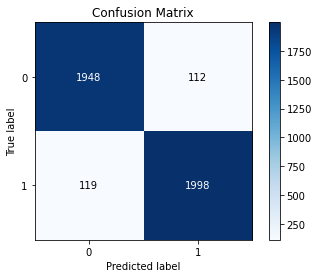

In [ ]:
#imprimir acuracia e classification metrics
print('Classification metrics: \n', classification_report(y_test, y_pred1))
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_test, y_pred1)))

##print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict))
skplt.metrics.plot_confusion_matrix(y_test, y_pred1);

###Curva AUC

In [ ]:
pred_prob = nb.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr3, p_tpr3, _ = roc_curve (y_test, random_probs, pos_label =1)

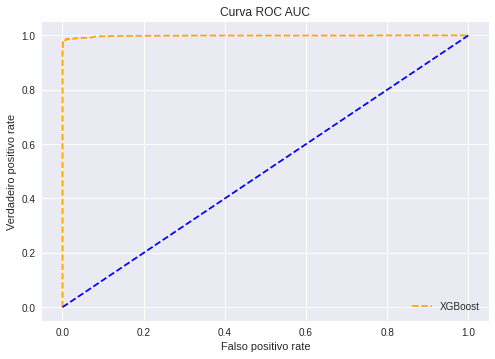

In [ ]:
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

#title
plt.title('Curva ROC AUC')
plt.xlabel('Falso positivo rate')
plt.ylabel('Verdadeiro positivo rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi =300)
plt.show();

In [ ]:
auc_score = roc_auc_score(y_test,pred_prob[:,1])

print('Curva ROC AUC: {:.4f}\n'.format(auc_score))

Curva ROC AUC: 0.9837



###Cross-Validation

In [ ]:
#Cross-Validation
cv =  KFold(n_splits = 10, shuffle = True)
scores = cross_val_score(nb, X, y, cv = cv)

print("Acurácia: %.2f%%" % (scores.mean() * 100.0))

Acurácia: 94.01%


##Verificando texto em spam ou legit

In [ ]:
def verificar_texto(text):
    t_string = transformar_texto(text)
    num_string = tfidf.transform([t_string])
    result = rf.predict(num_string)[0]
    if result == 1:
        print("spam")
    else:
        print("Not spam")    

In [ ]:
texto_spam = "You won a discount on our products, click on the link below to gain access"
verificar_texto(texto_spam)

spam


In [ ]:
texto_legitimo = "How's it going ?"
verificar_texto(texto_legitimo)

Not spam
